#### PRACTICAL MACHINE LEARNING
#### Assignment 1: Exploring and Visualizing Data
Authors : Chris Fiore, Shree Bharadwaj <br>
Reference : https://github.com/djp840/MSDS_422_Public 

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

This assignment focuses on bringing data into Python, exploring and visualizing data. You will need to install Python on your personal computer (Mac or Windows) prior to working on this assignment. See Python installation instructions under Modules / Technology Resources / Software for Practical Machine Learning (Python version).

As part of this assignment, you are asked to choose a variable with meaningful magnitude and examine the effects of two transformations (scaling methods) on that variable.

Background Materials
COVID 19 is an ongoing threat.  Data for the outbreak are available here:  
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide 

Using this data, you are to conduct exploratory data analysis.  Provide appropriate descriptive statistics  / visualizations to help understand the spread of the disease (incidence) as well as its fatality rate.  You should also engage in feature creation and variable transformation.  At a bare minimum, feature creation should include generating rates per X in the population (i.e., rates per million).  Investigate time series as well as univariate and bivariate distribution graphs. 

Select one of variable and perform both min-max and standard scaling in Python.  
reference:  https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py 

Some methods we will learn in this course  (trees and random forests) are unaffected by monotonic transformations of the explanatory variables. Others (SVMs and neural networks) are very much affected by scaling and usually perform better when all explanatory variables have the same scale. It is often best to use scaling methods that preserve the shape of the distribution. But if there are extreme outliers or heavily skewed distributions, then log or normalizing transformations may be warranted.)

Management Questions
What are the management and analytical questions associated with this problem?

Python Programming
All programming will be done in Python.

-- Grading Guidelines (50 points)
1) Data preparation (10 points)
2) Data exploration (10 points)
3) Data visualization (10 points)
4) Data scaling and comparisons (10 points)
5) Insights from analysis (10 points)

Deliverables and File Formats
you can use this notebook to update comments or Provide a double-spaced paper with a two-page maximum for the text. The paper should include all a discussion of all graded elements but focus particularly on insights. Include your Python code and output as an appendix.  Upload this as a single .pdf file.

Formatting Python Code
Refer to Google’s Python Style Guide (Links to an external site.) for ideas about formatting Python code:

Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.

### Data Dictionary COVID-19 

The data frame has 61900 rows and 12 columns.<br>
This data frame contains the following columns:<br>
<b>dateRep</b><br>
Formatted  datetime64[ns]<br>
<b>day</b><br>
Calendar day, dtype int64<br>
<b>month</b><br>
Calendar month, dtype int64<br>
<b>year</b><br>
Calendar year, dtype int64<br>
<b>cases</b><br>
Number of Cases Per Day, dtype int64<br>
<b>deaths</b><br>
Number of Deaths, dtype int64<br>
<b>countriesAndTerritories </b><br>
Country Name, dtype object<br>
<b>popData2019</b><br>
Country Population<br>
<b>continentExp</b><br>
Continent continuous expanses of land (Africa, Antarctica, Asia, Australia, Europe, North America, South America)<br>
<b>Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 </b><br>
Cumulative Number For 14 Days of COVID-19 Cases per 100000<br>
<b>Sources:</b><br>

In [128]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [129]:
pip install --user --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [130]:
!pip install prettytable
!pip install geopandas

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable


In [131]:
###Loading Packages###
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map
import re # regular expressions
import scipy
import os # Operation System
import geopandas as gpd
from prettytable import PrettyTable
import seaborn as sns
import sklearn
import math
from datetime import datetime

In [132]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

##### Load Data

The dataset was downloaded directly to local drive from European Centre for Disease Prevention and Control at https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide. We first load the dataset then we use df.head() to show the first few rows to double check if the data is loaded properly. 

In [133]:
##### Load Data 
covid19_dfA=pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')

In [134]:
# Check few columns to make sure the data is loaded properly
covid19_dfA.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


#### Common functions/libraries

In [135]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')
    plt.show()
    plt.close()

np.set_printoptions(precision=3)

In [136]:
# overrides the default rcParams for plotting
def init_plotting():
    plt.style.use(style='ggplot')
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.labelcolor'] = 'black'
    plt.rcParams['xtick.color']= 'black'
    plt.rcParams['ytick.color']= 'black'

init_plotting()

# avoid empty plot, always good to close plot
plt.close()

#### Exploratory Data Analysis (EDA) 

In [137]:
# Get an understanding of the data
print("Shape:", covid19_dfA.shape,"\n")
print("Variable Types:") 
print(covid19_dfA.dtypes)

covid19_dfA.head(15)

Shape: (61900, 12) 

Variable Types:
dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
dtype: object


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-12-09,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


In [138]:
### examine the structure of the DataFrame object###
print('\nContents of covid19 data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Cases =', len(covid19_dfA), '\n') 

# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
covid19_dfA.columns

# abbreviated printing of the first five rows of the data frame
print(pd.DataFrame.head(covid19_dfA))


Contents of covid19 data ---------------

Number of Cases = 61900 

     dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-12-14   14     12  2020    746       6             Afghanistan    AF   
1 2020-12-13   13     12  2020    298       9             Afghanistan    AF   
2 2020-12-12   12     12  2020    113      11             Afghanistan    AF   
3 2020-12-11   11     12  2020     63      10             Afghanistan    AF   
4 2020-12-10   10     12  2020    202      16             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           9.013779           
1              

In [139]:
# Number of countries
len(covid19_dfA.countriesAndTerritories.unique())

214

<div class="alert alert-block alert-warning">
Attention to the <b>count</b> row will indicate if column has missing records
</div> 

In [140]:
# summary statistics
covid19_dfA.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,61900.000000,61900.000000,61900.000000,61900.000000,61900.000000,6.177700e+04,59021.000000
mean,15.628934,7.067157,2019.998918,1155.147237,26.055460,4.098770e+07,66.320586
std,8.841582,2.954776,0.032882,6779.224479,131.227055,1.531294e+08,162.329240
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.293120e+06,0.757526
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06,6.724045
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07,52.572719
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09,1900.836210


### Review Dataset for Missing Values

<div class="alert alert-block alert-warning">
Review dataset for missing records
</div>

In [141]:
covid19_dfA.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

## Preprocess Data for Analysis

#### Date Column formatted into ISO 8601 standard format (Year - Month - Day)

In [142]:
covid19_dfA['Date']=pd.to_datetime(covid19_dfA['dateRep'], format='%d/%m/%Y').dt.strftime('%Y%m%d')
covid19_dfA['Date']=pd.to_datetime(covid19_dfA['dateRep'], format='%Y/%m/%d')
covid19_dfA['Date'].head()

0   2020-12-14
1   2020-12-13
2   2020-12-12
3   2020-12-11
4   2020-12-10
Name: Date, dtype: datetime64[ns]

#### Review Data Types (dtypes)

In [143]:
covid19_dfA.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
Date                                                          datetime64[ns]

In [144]:
covid19_dfA.isnull().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
Date                                                             0
dtype: int64

We can see that there are null values for several fields but since we are focusing on cases and deaths in this assignment, the missing values won't impact our analysis. However, we need to check if number of cases and deaths are reasonable, in other words, non-negative values.

In [145]:
#drop rows with negative number of cases
covid19_dfA = covid19_dfA[covid19_dfA.cases >=0]

In [146]:
#drop rows with negative number of deaths
covid19_dfA = covid19_dfA[covid19_dfA.deaths >=0]

In [147]:
#add a new column for further analysis
covid19_dfA['deathRatio'] = round(covid19_dfA['deaths']/(covid19_dfA['cases']),3)

In [148]:
covid19_dfA.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Date,deathRatio
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14,0.008
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13,0.030
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12,0.097
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-12-11,0.159
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-12-10,0.079


In [149]:
covid19_dfA.shape

(61875, 14)

In [150]:
covid19_dfA.dtypes

dateRep                                                       datetime64[ns]
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
Date                                                          datetime64[ns]

## Visualizing Data

### Worldwide Cases & Deaths

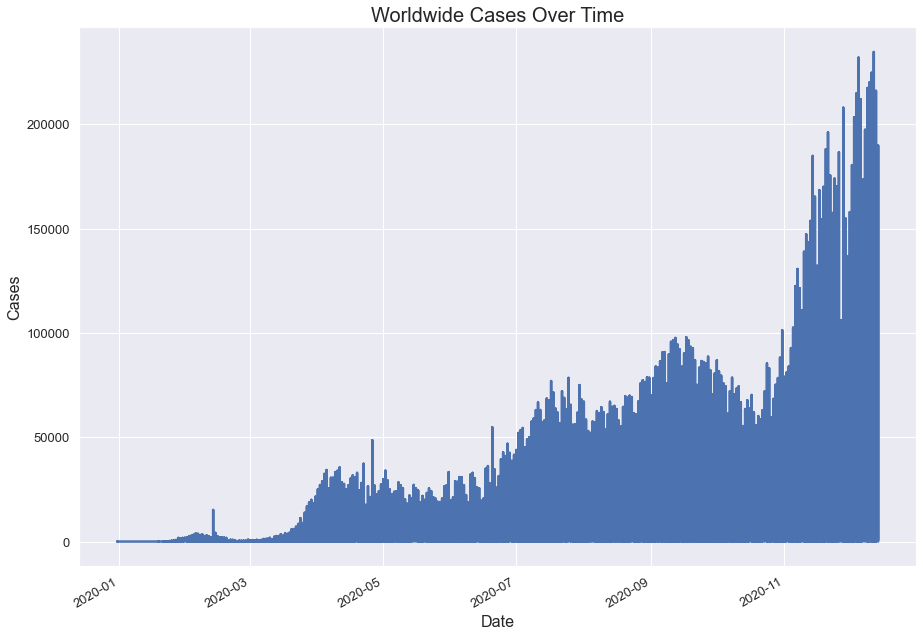

In [151]:
world_daily = covid19_dfA.set_index('Date')
sns.set_color_codes("colorblind")
sns.set(rc={'figure.figsize':(15, 11)})
world_daily['cases'].plot(linewidth = 2.5)


plt.title('Worldwide Cases Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

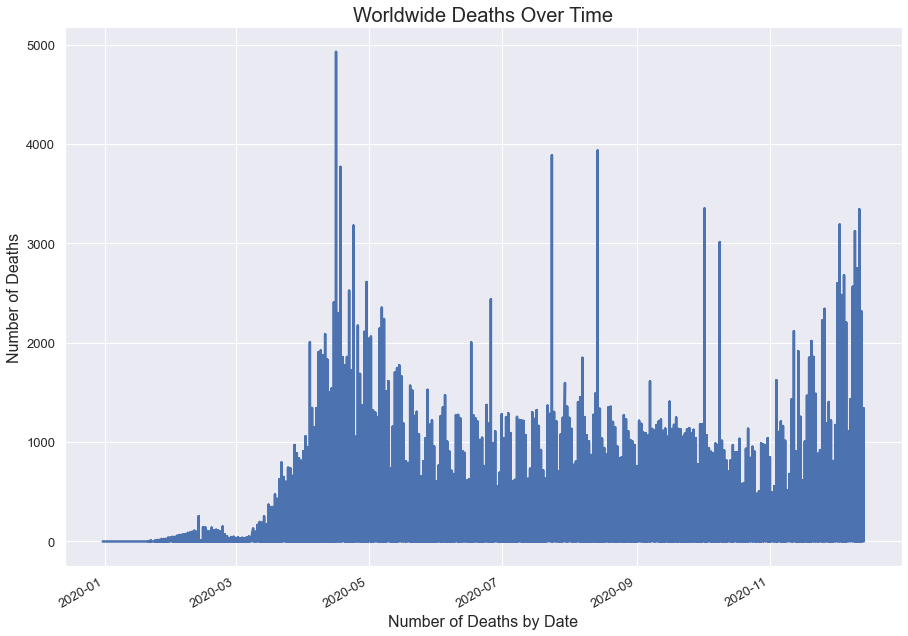

In [152]:
sns.set(rc={'figure.figsize':(15,11)})
world_daily['deaths'].plot(linewidth = 2.5)


plt.title('Worldwide Deaths Over Time', fontsize = 20)
plt.xlabel('Number of Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


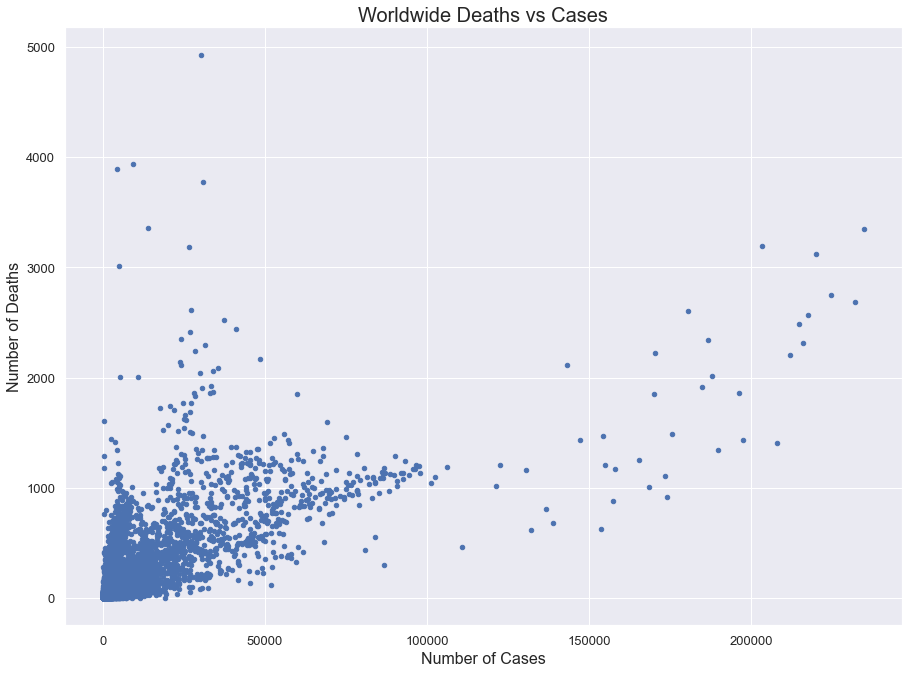

In [153]:
sns.set(rc={'figure.figsize':(15, 11)})
covid19_dfA.plot.scatter(x='cases',y='deaths')

plt.title('Worldwide Deaths vs Cases', fontsize = 20)
plt.xlabel('Number of Cases', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

### Americas Cases & Deaths

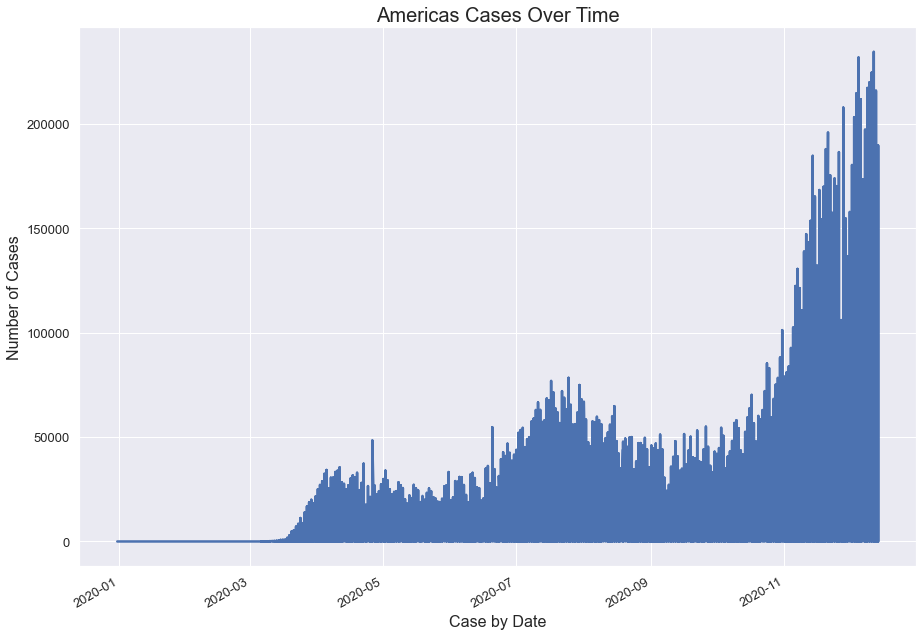

In [154]:
america_df = covid19_dfA[covid19_dfA["continentExp"] == "America"].reset_index()
america_daily = america_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
america_daily['cases'].plot(linewidth = 2.5)

plt.title('Americas Cases Over Time', fontsize = 20)
plt.xlabel('Case by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

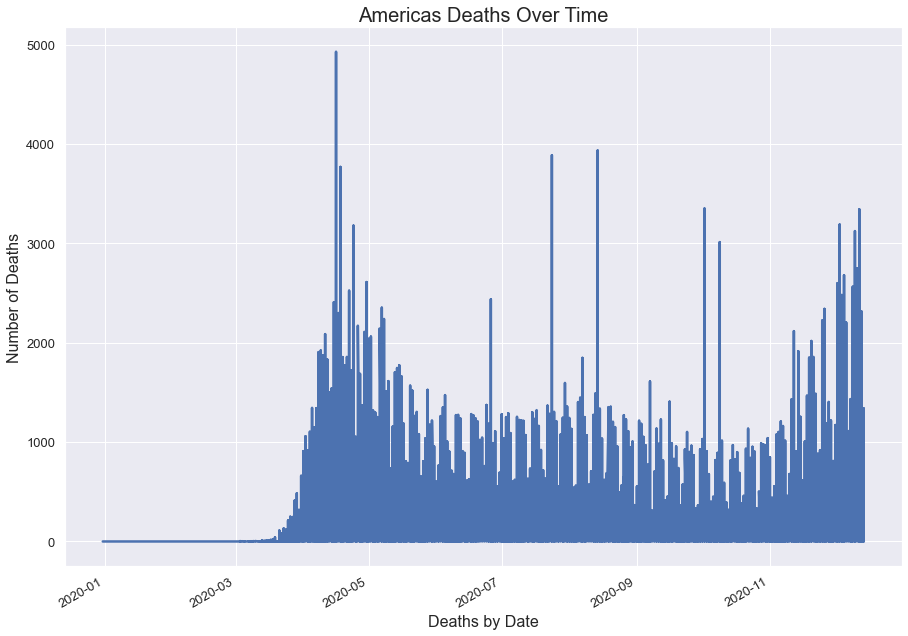

In [155]:
america_df = covid19_dfA[covid19_dfA["continentExp"] == "America"].reset_index()
america_daily = america_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
america_daily['deaths'].plot(linewidth = 2.5)

plt.title('Americas Deaths Over Time', fontsize = 20)
plt.xlabel('Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


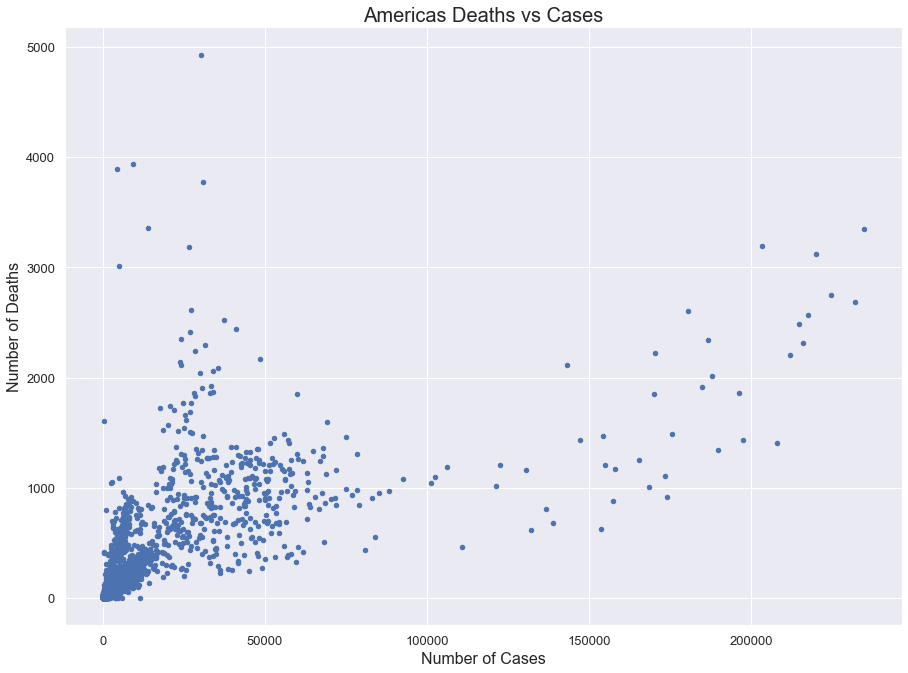

In [156]:
america_df = covid19_dfA[covid19_dfA["continentExp"] == "America"].reset_index()

sns.set(rc={'figure.figsize':(15, 11)})
america_df.plot.scatter(x='cases',y='deaths')

plt.title('Americas Deaths vs Cases', fontsize = 20)
plt.xlabel('Number of Cases', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

### US Cases & Deaths

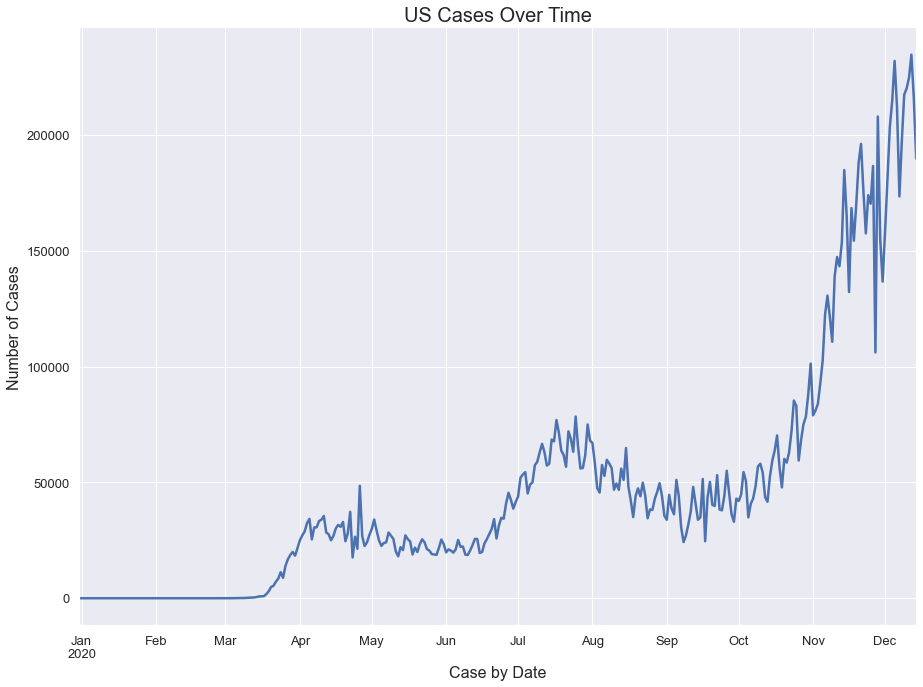

In [157]:
UScovid19_df = covid19_dfA[covid19_dfA["countriesAndTerritories"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['cases'].plot(linewidth = 2.5)

plt.title('US Cases Over Time', fontsize = 20)
plt.xlabel('Case by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Cases', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

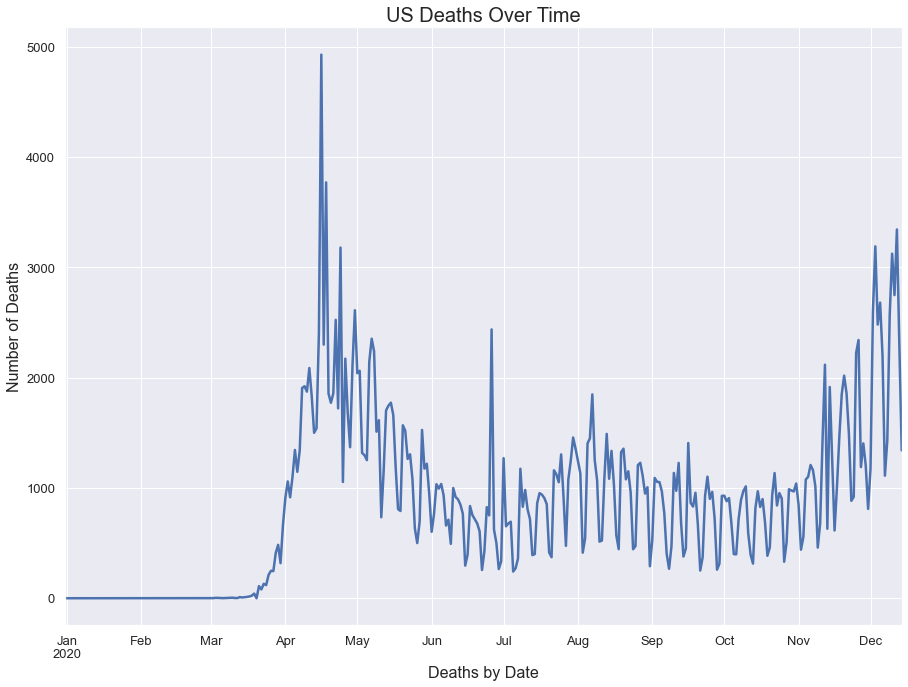

In [158]:
UScovid19_df = covid19_dfA[covid19_dfA["countriesAndTerritories"] == "United_States_of_America"].reset_index()
US_daily = UScovid19_df.set_index('Date')

sns.set(rc={'figure.figsize':(15, 11)})
US_daily['deaths'].plot(linewidth = 2.5)

plt.title('US Deaths Over Time', fontsize = 20)
plt.xlabel('Deaths by Date', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


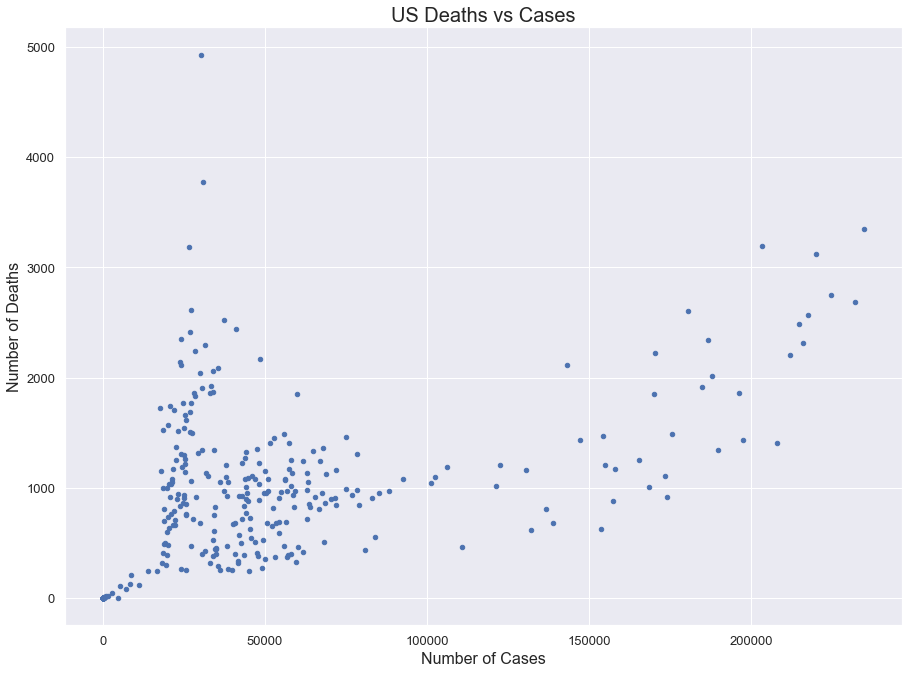

In [159]:
UScovid19_df = covid19_dfA[covid19_dfA["countriesAndTerritories"] == "United_States_of_America"].reset_index()

sns.set(rc={'figure.figsize':(15, 11)})
UScovid19_df.plot.scatter(x='cases',y='deaths')

plt.title('US Deaths vs Cases', fontsize = 20)
plt.xlabel('Number of Cases', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Number of Deaths', fontsize = 16)
plt.yticks(fontsize = 13)

plt.show()

#### Data Scaling & Comparisons






##### Min-Max Scaler

In [160]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Text(0.5, 0, 'US Cases')

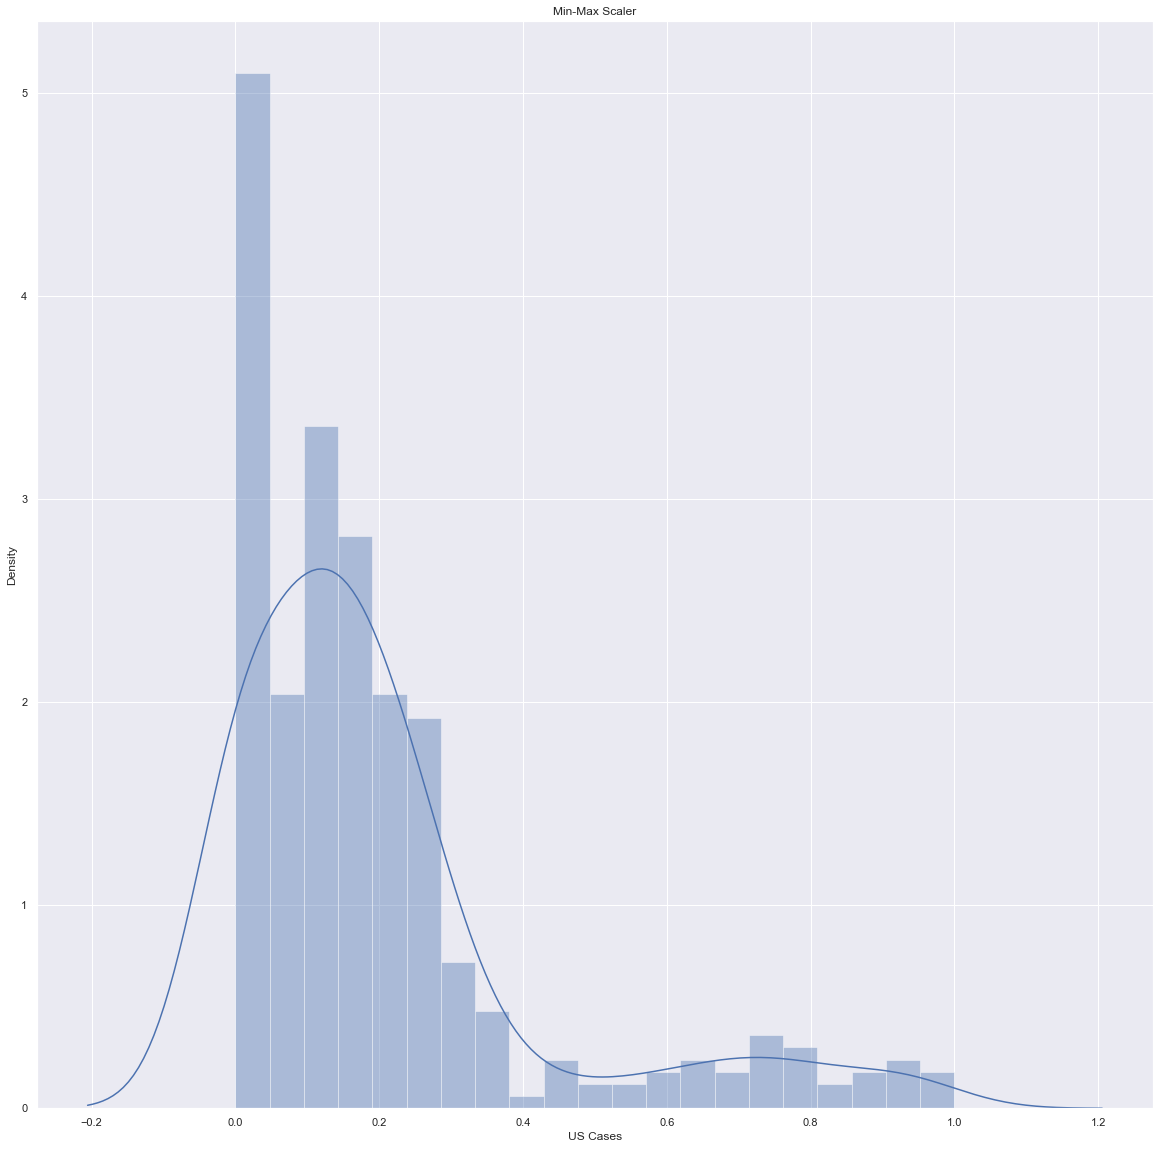

In [161]:
US_Min_Max = MinMaxScaler().fit_transform(UScovid19_df.cases.values.reshape(-1, 1))
sns.set(rc={'figure.figsize':(20,20)})
sns.distplot(US_Min_Max).set_title('Min-Max Scaler')
plt.xlabel('US Cases')

##### Standard Scaler

Text(0.5, 0, 'US Cases')

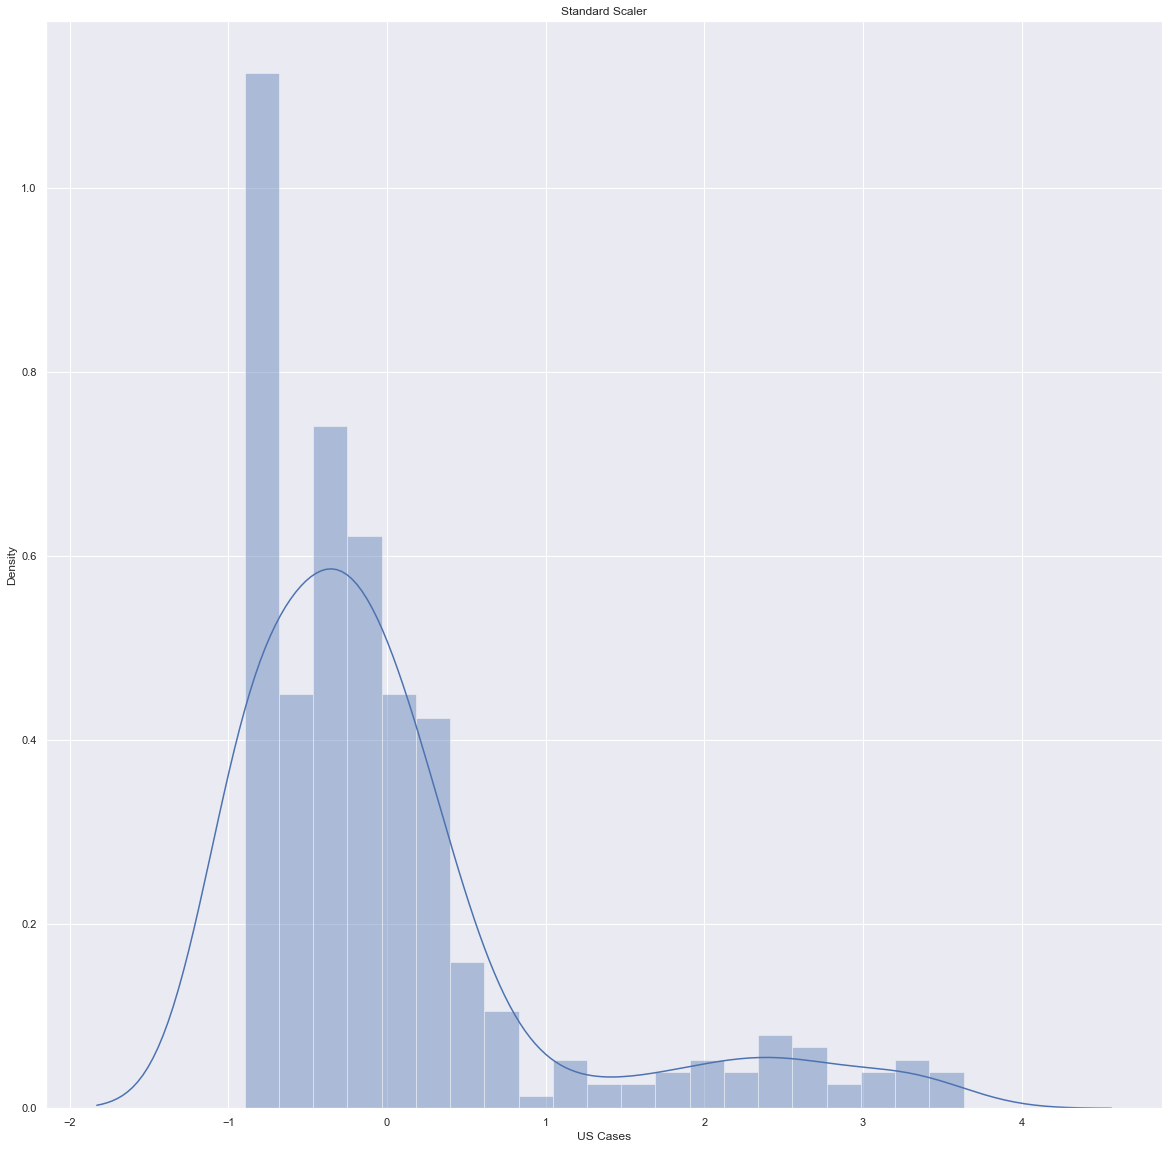

In [162]:
US_std = StandardScaler().fit_transform(UScovid19_df.cases.values.reshape(-1, 1))
sns.set(rc={'figure.figsize':(20,20)})
sns.distplot(US_std).set_title('Standard Scaler')
plt.xlabel('US Cases')

FINDINGS/ANALYSIS:



We can see from the two graphs of the standard scaler and min-max scaler that they yield to similar shapes of the histograms. They are both positively skewed, which points to possible outliers and we can also see that in the previous graphs. However, the outliers may not be easily replaced or removed because the daily cases flutuates for many reasons. WHO declared COVID-19 a pandemic in March 2020, which may explain the bump in April because of the increasing awareness and that there are more testings and more previous cases discovered. Also, the sudden drop in late November could because of the Thanksgiving holidays that people are busy gathering with families so less testings and also less reporting from labs because technicians are off for holidays.